## 1.Utilities

In [ ]:
!pip3 install flair 
!pip install vaderSentiment
            
import pandas as pd             # for data handling
import seaborn as sns           # for heatmap visualizations
import flair                    # flair model for sentiment analysis
import spacy                    # for entitity extraction

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import nltk                     # Natural Language Toolkit for NLP
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
     |████████████████████████████████| 322 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 49.8 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 981 kB 45.6 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 788 kB 40.4 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 3.8 MB 39.7 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.5 MB 40.4 MB/s 
     |████████████████████████████████| 596 kB 48.0 MB/s 
     |████████████████████████████████| 895 kB 65.5 MB/s 
  Cre

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## 2.Sentiment Analysis using Model: Vader

In [ ]:
# analyzing sentiment intensity using sid of Vader
sid = SentimentIntensityAnalyzer()

### 2.1 test sentence 

In [ ]:
sentence="Hello there, you are amazing"

In [ ]:
# to get sentiment polarity scores | defines as 'pos, 'neg', 'neu' & gives a 'compund' score
sid.polarity_scores(sentence)

{'compound': 0.5859, 'neg': 0.0, 'neu': 0.513, 'pos': 0.487}

### 2.11 test Heatmap

In [ ]:
# set figure size
sns.set(rc={'figure.figsize':(30,1)})

# function definition
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

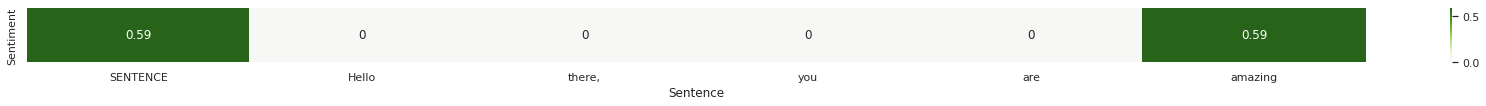

In [ ]:
# passing data to function
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

### 2.3 Read Preprocessed Data

In [ ]:
dataset=pd.read_csv('/content/preprocessed_dataset.csv')
dataset.head()

,title,transcript,Preprocessed
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...


### 2.4 Executing Vader on each Transcript

In [ ]:
dataset['scores'] = dataset['Preprocessed'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
dataset

,title,transcript,Preprocessed,scores
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...,"{'neg': 0.024, 'neu': 0.861, 'pos': 0.115, 'co..."
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...,"{'neg': 0.074, 'neu': 0.858, 'pos': 0.068, 'co..."
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...,"{'neg': 0.052, 'neu': 0.783, 'pos': 0.165, 'co..."
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...,"{'neg': 0.065, 'neu': 0.709, 'pos': 0.226, 'co..."
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...,"{'neg': 0.039, 'neu': 0.755, 'pos': 0.205, 'co..."
5,crypto_means,crypto is just one big ponzi and can change my...,crypto one big pond change mind doubt sell wis...,"{'neg': 0.111, 'neu': 0.688, 'pos': 0.201, 'co..."
6,digital_token,token from your next the word pawnshop in lieu...,token next word pawnshop lieu small change nex...,"{'neg': 0.091, 'neu': 0.697, 'pos': 0.212, 'co..."
7,cryptocurrency,a run up in cryptocurrency prices last decembe...,run cryptocurrency price last december also di...,"{'neg': 0.062, 'neu': 0.799, 'pos': 0.139, 'co..."
8,dodo,the dodo is an extinct flightless bird that wa...,todo extinct flightless bird endemic island vi...,"{'neg': 0.061, 'neu': 0.879, 'pos': 0.06, 'com..."
9,dolphin,dolphins are small toothed cetaceans easily re...,dolphin small toothed cetacean easily recogniz...,"{'neg': 0.077, 'neu': 0.791, 'pos': 0.132, 'co..."


In [ ]:
dataset['compound']  = dataset['scores'].apply(lambda score_dict: score_dict['compound'])
dataset.head()

,title,transcript,Preprocessed,scores,compound
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...,"{'neg': 0.024, 'neu': 0.861, 'pos': 0.115, 'co...",0.9410
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...,"{'neg': 0.074, 'neu': 0.858, 'pos': 0.068, 'co...",-0.3773
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...,"{'neg': 0.052, 'neu': 0.783, 'pos': 0.165, 'co...",0.9831
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...,"{'neg': 0.065, 'neu': 0.709, 'pos': 0.226, 'co...",0.9955
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...,"{'neg': 0.039, 'neu': 0.755, 'pos': 0.205, 'co...",0.9974


In [ ]:
def sentiment_score_compound(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

def sentiment_score_pos(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['pos']

def sentiment_score_neg(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neg']

def sentiment_score_neu(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neu']

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2['title'] = dataset["title"]
df2['Transcript'] = dataset['Preprocessed'].values
df2['vs_pos'] = dataset.apply(lambda row: sentiment_score_pos(row['Preprocessed']), axis=1)
df2['vs_neg'] = dataset.apply(lambda row: sentiment_score_neg(row['Preprocessed']), axis=1)
df2['vs_neu'] = dataset.apply(lambda row: sentiment_score_neu(row['Preprocessed']), axis=1)
df2['vs_compound'] = dataset.apply(lambda row: sentiment_score_compound(row['Preprocessed']), axis=1)

In [ ]:
df2

,title,Transcript,vs_pos,vs_neg,vs_neu,vs_compound
0,astronomy,astronomy literally mean science study law sta...,0.115,0.024,0.861,0.9410
1,white dwarf,white dwarf also call degenerate dwarf stellar...,0.078,0.065,0.857,0.3356
2,chimp,chimpanzee great ape find across central west ...,0.164,0.052,0.784,0.9831
3,crypto,top four crypto exchange india buy two poker c...,0.225,0.065,0.710,0.9955
4,crypto_tax,india recently introduce crypto tax budget two...,0.210,0.039,0.751,0.9976
5,crypto_means,crypto one big pond change mind doubt sell wis...,0.201,0.111,0.688,0.9439
6,digital_token,token next word pawnshop lieu small change nex...,0.212,0.091,0.697,0.9584
7,cryptocurrency,run cryptocurrency price last december also di...,0.139,0.062,0.799,0.9694
8,dodo,todo extinct flightless bird endemic island vi...,0.060,0.061,0.879,-0.2732
9,dolphin,dolphin small toothed cetacean easily recogniz...,0.132,0.077,0.791,0.7906


### 2.5 Saving the sentiment scores

In [ ]:
df2.to_csv('sentiment_scores.csv')

In [ ]:
from google.colab import files
files.download('sentiment_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SNS Heatmap

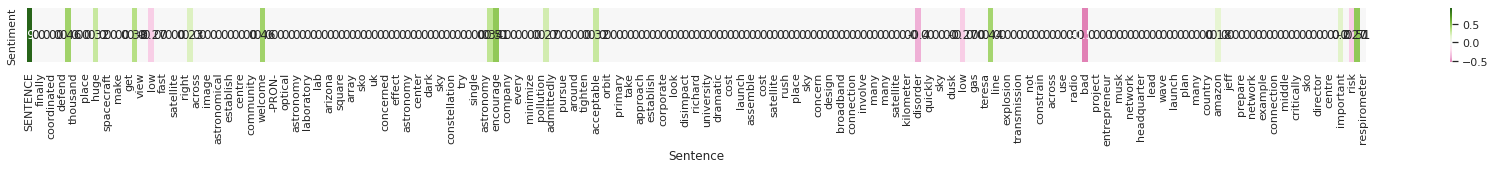

In [ ]:
# passing transcript to the function
visualise_sentiments({
    "Sentence":["SENTENCE"] + dataset['Preprocessed'][0].split(),
    "Sentiment":[sid.polarity_scores(dataset['Preprocessed'][0])["compound"]] + [sid.polarity_scores(word)["compound"] for word in dataset['Preprocessed'][0].split()]
  })

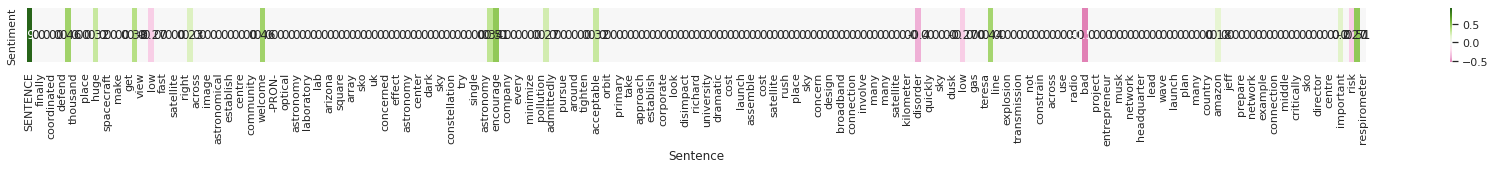

In [ ]:
# for i in range(len(dataset['Preprocessed'])):
for i in range(1):
  visualise_sentiments({
    "Sentence":["SENTENCE"] + dataset['Preprocessed'][i].split(),
    "Sentiment":[sid.polarity_scores(dataset['Preprocessed'][i])["compound"]] + [sid.polarity_scores(word)["compound"] for word in dataset['Preprocessed'][i].split()]
  })

# 3.Entity Extraction using SpaCy

### 3.1 Applying entity extraction

In [ ]:
# Defining a function to processes each transcript
entities = []
def get_entities(i):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(dataset['Preprocessed'][i])
  for entity in doc.ents:
    entities.append((i,entity.text , entity.label_))
    print(entity.text, entity.label_)

# feeding transcript one by one
for i in range(len(dataset['Preprocessed'])):
  print('\n**********Entitites for Transcript', i+1,'***********')
  get_entities(i)


**********Entitites for Transcript 1 ***********
planet moon LOC
nebula galaxie PERSON
supernova PERSON
ray burst quay blazer PRODUCT
microwave ORG
renaissance ORG
galileo PRODUCT
galileo PRODUCT
first ORDINAL
one CARDINAL
sun moon LOC
one CARDINAL
one CARDINAL

**********Entitites for Transcript 2 ***********
white dwarf ORG
stellar NORP
earth LOC
third ORDINAL
white dwarf ORG
eight CARDINAL
six light year DATE
eight CARDINAL
hundred CARDINAL
first ORDINAL
nineteen ten DATE
white dwarf ORG
william law PERSON
nineteen twenty two DATE
ninety seven percent PERCENT
ten CARDINAL
neon magnesium PERSON
white dwarf chorus acre ORG
one CARDINAL
four four CARDINAL

**********Entitites for Transcript 3 ***********
central west africa LOC
ninety eight point QUANTITY
seven percent PERCENT
live seven thirteen million year ago MONEY
several dozen CARDINAL
alpha male coalition male ally research ORG
four CARDINAL
one CARDINAL
central western africa LOC
uganda GPE
nut hundred EVENT
thirteen CARDINAL


In [ ]:
#feeding in a dataframe
df_ner = pd.DataFrame.from_records(entities, columns =['Transcript','ent_name', 'ent_type'])

In [ ]:
df_ner.head(35)

,Transcript,ent_name,ent_type
0,0,planet moon,LOC
1,0,nebula galaxie,PERSON
2,0,supernova,PERSON
3,0,ray burst quay blazer,PRODUCT
4,0,microwave,ORG
5,0,renaissance,ORG
6,0,galileo,PRODUCT
7,0,galileo,PRODUCT
8,0,first,ORDINAL
9,0,one,CARDINAL


### 3.2 Saving the dataframe

In [ ]:
df_ner.to_csv('entities.csv')

# 4.Sentiment Analysis using Model: Flair

In [ ]:
# load flair sentiment model
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2022-03-02 12:16:26,520 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpkh_pxx3f


100%|██████████| 265512723/265512723 [00:10<00:00, 25568556.85B/s]

2022-03-02 12:16:37,230 copying /tmp/tmpkh_pxx3f to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-03-02 12:16:37,949 removing temp file /tmp/tmpkh_pxx3f
2022-03-02 12:16:38,000 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

### 4.1 test sentence

In [ ]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9948)]

### 4.2 test Heatmap

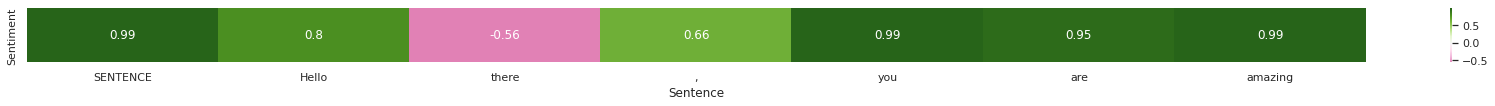

In [ ]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

### 4.3 Executing Flair on each Transcript

In [ ]:
for i in range(len(dataset['Preprocessed'])):
  s = flair.data.Sentence(dataset['Preprocessed'][i])
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  print(i,total_sentiment)

0 [POSITIVE (0.9571)]
1 [POSITIVE (0.947)]
2 [POSITIVE (0.8253)]
3 [POSITIVE (0.9959)]
4 [NEGATIVE (0.9613)]
5 [NEGATIVE (0.993)]
6 [NEGATIVE (0.9696)]
7 [POSITIVE (0.8767)]
8 [NEGATIVE (0.9021)]
9 [NEGATIVE (0.5115)]
10 [NEGATIVE (0.7822)]
11 [NEGATIVE (0.9806)]
12 [NEGATIVE (0.9723)]
13 [NEGATIVE (0.9046)]
14 [POSITIVE (0.9308)]
15 [NEGATIVE (0.9503)]
16 [POSITIVE (0.5159)]
17 [NEGATIVE (0.8893)]
18 [NEGATIVE (0.8883)]
19 [POSITIVE (0.9488)]
20 [POSITIVE (0.8863)]
21 [NEGATIVE (0.9476)]
22 [POSITIVE (0.9691)]
23 [POSITIVE (0.9243)]
24 [POSITIVE (0.9573)]


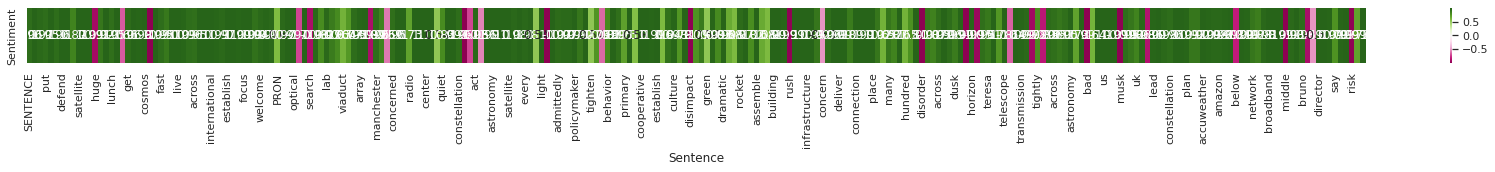

In [ ]:
def get_heatmap(s):
  tokens = [token.text for token in s.tokens]
  ss = [flair.data.Sentence(s) for s in tokens]
  [flair_sentiment.predict(s) for s in ss]
  sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

  visualise_sentiments({
        "Sentence":["SENTENCE"] + tokens,
        "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
  })
for i in range(1):
  s = flair.data.Sentence(dataset['Preprocessed'][i])
  get_heatmap(s)

# 5.Keyword Extraction from Transcripts

In [ ]:
df['key_words'] = df['Preprocessed']

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Tokenizing text
for t in range (0,len(df)) :
    if pd.notnull(df.key_words[t]):
        x = df.key_words[t]
        words = word_tokenize(x)
        words=[word.lower() for word in words if word.isalpha()]
        filtered_sentence = []

# Removing filler words        
        for w in words:
            if w not in stop_words:
                filtered_sentence.append(w) 

# Lemmatizing filtered words                
        custom_lemmas = []
        for w in filtered_sentence:
            word_tokens = word_tokenize(w)
            for w in word_tokens:
                custom_lemmas.append(lemmatiser.lemmatize(w))

        tag = nltk.pos_tag(custom_lemmas)

# Filtering keywords out of lemmas accoding to pos tagging        
        keyword = []
        count = 0

        while count < len(tag):
            if (tag[count][1] == "JJ" or tag[count][1] == "RB"):
                keyword.append(tag[count][0])
            count = count + 1

        df.key_words[t] = ', '.join(keyword )
df.to_csv("keywords.csv")

In [ ]:
print(df[["title","key_words"]])

                title                                          key_words
0           astronomy  astronomy, literally, mean, natural, celestial...
1         white dwarf  white, also, call, stellar, mostly, electron, ...
2               chimp  great, central, close, relative, percent, gene...
3              crypto  top, india, crypto, apart, major, new, first, ...
4          crypto_tax  recently, crypto, co, happy, increase, third, ...
5        crypto_means  big, wish, ample, real, back, physical, micros...
6       digital_token  token, next, small, next, digitally, big, glob...
7      cryptocurrency  last, also, new, top, seventy, december, avera...
8                dodo  extinct, flightless, endemic, vicious, indian,...
9             dolphin  small, toothed, cetacean, easily, recognizable...
10           elephant  elephant, large, mammal, distinctly, massive, ...
11  fd_mutual_finance  fix, small, scheme, traditional, average, indi...
12            finance  grief, green, financial, oft

In [ ]:
df

,title,transcript,Preprocessed,key_words
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...,"astronomy, literally, mean, natural, celestial..."
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...,"white, also, call, stellar, mostly, electron, ..."
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...,"great, central, close, relative, percent, gene..."
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...,"top, india, crypto, apart, major, new, first, ..."
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...,"recently, crypto, co, happy, increase, third, ..."
5,crypto_means,crypto is just one big ponzi and can change my...,crypto one big pond change mind doubt sell wis...,"big, wish, ample, real, back, physical, micros..."
6,digital_token,token from your next the word pawnshop in lieu...,token next word pawnshop lieu small change nex...,"token, next, small, next, digitally, big, glob..."
7,cryptocurrency,a run up in cryptocurrency prices last decembe...,run cryptocurrency price last december also di...,"last, also, new, top, seventy, december, avera..."
8,dodo,the dodo is an extinct flightless bird that wa...,todo extinct flightless bird endemic island vi...,"extinct, flightless, endemic, vicious, indian,..."
9,dolphin,dolphins are small toothed cetaceans easily re...,dolphin small toothed cetacean easily recogniz...,"small, toothed, cetacean, easily, recognizable..."


In [ ]:
df['key_words']

0     astronomy, literally, mean, natural, celestial...
1     white, also, call, stellar, mostly, electron, ...
2     great, central, close, relative, percent, gene...
3     top, india, crypto, apart, major, new, first, ...
4     recently, crypto, co, happy, increase, third, ...
5     big, wish, ample, real, back, physical, micros...
6     token, next, small, next, digitally, big, glob...
7     last, also, new, top, seventy, december, avera...
8     extinct, flightless, endemic, vicious, indian,...
9     small, toothed, cetacean, easily, recognizable...
10    elephant, large, mammal, distinctly, massive, ...
11    fix, small, scheme, traditional, average, indi...
12    grief, green, financial, often, corporate, how...
13    archer, april, fifteenth, nineteen, english, n...
14    extinct, hairy, elephant, mammal, live, ago, c...
15    january, nineteen, forty, japanese, novel, sho...
16    safe, markedly, instrument, instrument, net, a...
17    august, fourth, nineteen, brazil, brazilia

# 6.Keyword extraction with TF-IDF

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)


CPU times: user 3.56 ms, sys: 0 ns, total: 3.56 ms
Wall time: 11.6 ms


In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
    
def extract_topn_from_vector(feature_names, sorted_items, topn=40):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
# get feature names
feature_names=cv.get_feature_names()

def get_keywords(idx, docs):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([docs[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 40
    keywords=extract_topn_from_vector(feature_names,sorted_items,40)
    
    return keywords

def print_results(idx,keywords, df):
    # now print the results
    print("\n=====Title=====")
    print(df['title'][idx])
    print("\n=====Transcript=====")
    print(df['Preprocessed'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
idx=23
keywords=get_keywords(idx, docs)
print_results(idx,keywords, df)


=====Title=====
vaccine_news

=====Transcript=====
nineteen ground vaccine prize bayern clinical trial micro specific vaccine prize byron begin clever transfer armada specific vaccine press release prize announce initiation clinical study evaluate safety tolerability emotional generosity underground base vaccine candidate healthy adult eighteen fifty five year age accord information nee study three different examination evaluate evaluate fourteen twenty participant study part science base approach develop already base vaccine achieve similar level protection emigrant early higgin long duration protection say professor pagos hint ceo co founder ante three cohort examination cover number one participant already fascinate prize overnighting vaccine receive hundred coach underground base c code number two participant two vaccine after bookstore receive one american base vaccine cover number three non fascinated participant receive two dose american base base vaccine part ongoing effort ad

### 6.1 Generating TF IDF for all documents

In [ ]:
#generate tf-idf for all documents in your list. docs_test has 500 documents
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo(curr_vector.tocoo())

    #extract only the top n; n here is 40
    keywords=extract_topn_from_vector(feature_names,sorted_items,35)
    
    
    results.append(keywords)

df2=pd.DataFrame(zip(docs,results),columns=['Preprocessed','keywords'])


In [ ]:
df2

,Preprocessed,keywords
0,astronomy literally mean science study law sta...,"{'astronomy': 0.251, 'model': 0.209, 'celestia..."
1,white dwarf also call degenerate dwarf stellar...,"{'dwarf': 0.437, 'white dwarf': 0.43, 'white':..."
2,chimpanzee great ape find across central west ...,"{'chimpanzee': 0.355, 'tree': 0.175, 'champ': ..."
3,top four crypto exchange india buy two poker c...,"{'exchange': 0.424, 'crypto': 0.239, 'investor..."
4,india recently introduce crypto tax budget two...,"{'asset': 0.235, 'digital': 0.215, 'digital as..."
5,crypto one big pond change mind doubt sell wis...,"{'crypto': 0.218, 'pond': 0.147, 'cryptocurren..."
6,token next word pawnshop lieu small change nex...,"{'next': 0.123, 'cryptocurrency': 0.115, 'tran..."
7,run cryptocurrency price last december also di...,"{'report': 0.253, 'return': 0.235, 'coin': 0.1..."
8,todo extinct flightless bird endemic island vi...,"{'todo': 0.398, 'relative': 0.111, 'yellow': 0..."
9,dolphin small toothed cetacean easily recogniz...,"{'dolphin': 0.58, 'river': 0.109, 'water': 0.0..."


### 6.2 Saving our dataset

In [ ]:
df2.to_csv('transcript_keywords.csv')

In [ ]:
keyword = pd.read_csv('transcript_tfidf_keywords.csv')

In [ ]:
keyword

,id,keywords
0,0,"astronomy , model , celestial , object , helpe..."
1,1,"dwarf , white dwarf , white , star , degenerat..."
2,2,"chimpanzee , tree , champ , male , female , us..."
3,3,"exchange , crypto , investor , crypto exchange..."
4,4,"asset , digital , digital asset , crypto , tax..."
5,5,"crypto , pond , cryptocurrency , scheme , say ..."
6,6,"next , cryptocurrency , transparency , mine , ..."
7,7,"report , return , coin , bitcoin , top , perce..."
8,8,"todo , relative , yellow , pigeon , grey , cen..."
9,9,"dolphin , river , water , ocean , threat , riv..."
